In [1]:
import CRISP

# Atom Indices

### P.S.: The trajectory used is a for "FAU" zeolites with 24 Aluminium in the framework and 48 Waters.

In [2]:
from CRISP.atom_indices import run_atom_indices

# Path to your ASE trajectory file
file_path = "./wrapped_traj.traj"

# Output folder to save the indices
output_folder = './indices_new/'

# Define the cutoffs dictionary correctly
cutoffs = {
    ("O", "H"): 1.2,
    ("Si", "O"): 1.8,
    ("Al", "Si"): 3.2,
    ("O", "O"): 3.0,
}

# Run the atom_indices function and save the results with a specific frame index
run_atom_indices(file_path, output_folder, frame_index=2, cutoffs=cutoffs)


Length of O indices: 432
Length of Si indices: 168
Length of H indices: 120
Length of Al indices: 24
Outputs saved.
Saved cutoff indices for O-H to ./indices_new/cutoff/O-H_cutoff.csv
Saved cutoff indices for Si-O to ./indices_new/cutoff/Si-O_cutoff.csv
Saved cutoff indices for Al-Si to ./indices_new/cutoff/Al-Si_cutoff.csv
Saved cutoff indices for O-O to ./indices_new/cutoff/O-O_cutoff.csv


### TIP: paiwise cutoffs can be adjusted to fine tune different types of a particular atom. (Say "O" distinction from Water to framewrok for a structure)

In [26]:
import numpy as np

al_indices = np.load("./indices_new/Al_indices.npy")

print("Al_Indices:", al_indices)

from CRISP.visualize_atom_indices import visualize

visualize(file_path, frame_index=2) 

Al_Indices: [168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191]


### TIP: Visualise to check if the atom indices are classified correctly

# Atom Coordination

In [11]:
from CRISP import cn_atom

file_path = "./wrapped_traj.traj"
indices_path = "./indices_new/O_indices.npy"
output_file = "coordination_data.pkl"

# Define the cutoffs and atom coordination
cutoffs = {("O", "O"): 3.0}
atom_cn = "O"

# Call the function with the file paths and parameters
cn_atom.calculate_atom_coordination(file_path, indices_path, output_file, frame_skip=2, cutoffs=cutoffs, atom=atom_cn)


First entry of the coordination types list: {192: 6, 193: 6, 194: 6, 195: 6, 196: 6, 197: 6, 198: 6, 199: 6, 200: 6, 201: 7, 202: 6, 203: 6, 204: 6, 205: 6, 206: 6, 207: 6, 208: 6, 209: 6, 210: 6, 211: 6, 212: 7, 213: 7, 214: 8, 215: 7, 216: 7, 217: 7, 218: 7, 219: 7, 220: 6, 221: 6, 222: 6, 223: 6, 224: 6, 225: 6, 226: 6, 227: 6, 228: 6, 229: 6, 230: 6, 231: 6, 232: 6, 233: 6, 234: 6, 235: 6, 236: 6, 237: 6, 238: 6, 239: 6, 240: 6, 241: 6, 242: 6, 243: 6, 244: 7, 245: 6, 246: 6, 247: 6, 248: 6, 249: 6, 250: 6, 251: 6, 252: 7, 253: 7, 254: 7, 255: 6, 256: 6, 257: 6, 258: 6, 259: 6, 260: 6, 261: 7, 262: 7, 263: 7, 264: 6, 265: 6, 266: 6, 267: 6, 268: 6, 269: 6, 270: 6, 271: 6, 272: 7, 273: 7, 274: 7, 275: 7, 276: 6, 277: 6, 278: 6, 279: 6, 280: 6, 281: 6, 282: 6, 283: 6, 284: 7, 285: 6, 286: 6, 287: 6, 288: 6, 289: 6, 290: 6, 291: 6, 292: 7, 293: 7, 294: 6, 295: 6, 296: 6, 297: 6, 298: 7, 299: 7, 300: 6, 301: 6, 302: 6, 303: 6, 304: 6, 305: 6, 306: 7, 307: 7, 308: 6, 309: 6, 310: 6, 311

### TIP: Check the atom indices .csv files to guess the cutoff for different atoms
### Also one can pick any of the atom indices to comapre the assigned "First entry of the coordination types list" with the coordination visually. 

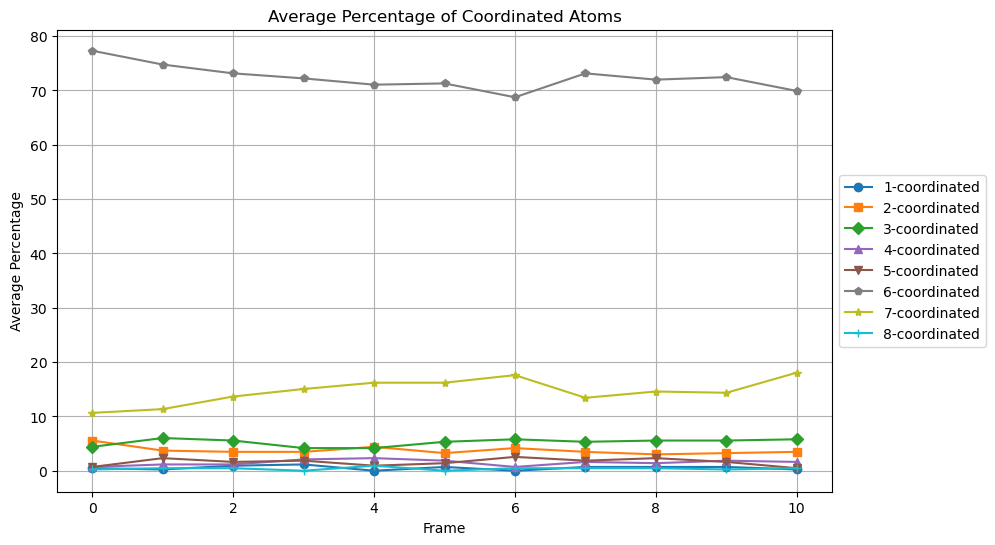

Overall Average percentage of 1-coordinated atoms: 0.53%
Overall Average percentage of 2-coordinated atoms: 3.75%
Overall Average percentage of 3-coordinated atoms: 5.24%
Overall Average percentage of 4-coordinated atoms: 1.49%
Overall Average percentage of 5-coordinated atoms: 1.60%
Overall Average percentage of 6-coordinated atoms: 72.37%
Overall Average percentage of 7-coordinated atoms: 14.65%
Overall Average percentage of 8-coordinated atoms: 0.38%


In [12]:
from CRISP.cn_atom_analysis import main as analyze_and_plot

# Define the file paths
pickle_file = './coordination_data.pkl'
plot_output_file = None  # or specify a path to save the plot, e.g., 'coordination_plot.png'

# Call the analysis and plotting function
analyze_and_plot(pickle_file, plot_output_file)

# H-bond 

### Disclaimer: I used "indices_detailed" folder which was generated with a modified "atom_indices" script to gain further classification of individual atoms. ( e.g. water Oxygen from framework of zeolites) 

### Still some missed some waters, but with some fine tuning and manul classifcation, all atoms ought to be labelled.  

In [9]:
from CRISP.h_bond import analyze_hydrogen_bonds

traj_path = './wrapped_traj.traj'
donor_indices = '../indices_detailed/ex_fram_ox.npy'
acceptor_indices = './indices_detailed/ex_fram_ox.npy'
hydrogen_indices = '../indices_detailed/wat_h.npy'
output_file = './hydrogen_bonds.csv'
frame_skip = 2
donor_acceptor_distance = 3.5
donor_hydrogen_distance = 1.2
angle_cutoff = 30.0

# Call the analysis function
analyze_hydrogen_bonds(traj_path, donor_indices, acceptor_indices, hydrogen_indices, output_file, frame_skip, donor_acceptor_distance, donor_hydrogen_distance, angle_cutoff)

### TIP: run for a frame of small subset of the trajectory to check the input parametrs, 
### Also try to use frame skips to make the calculation faster 

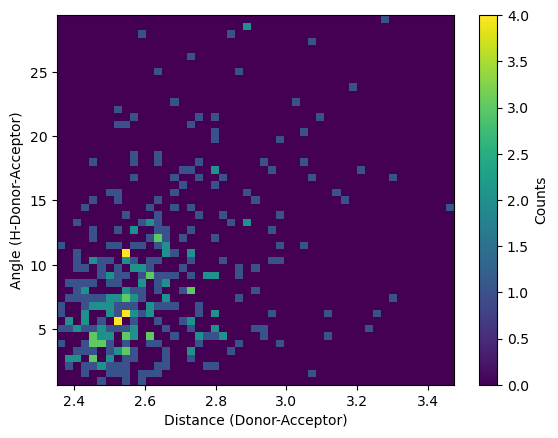

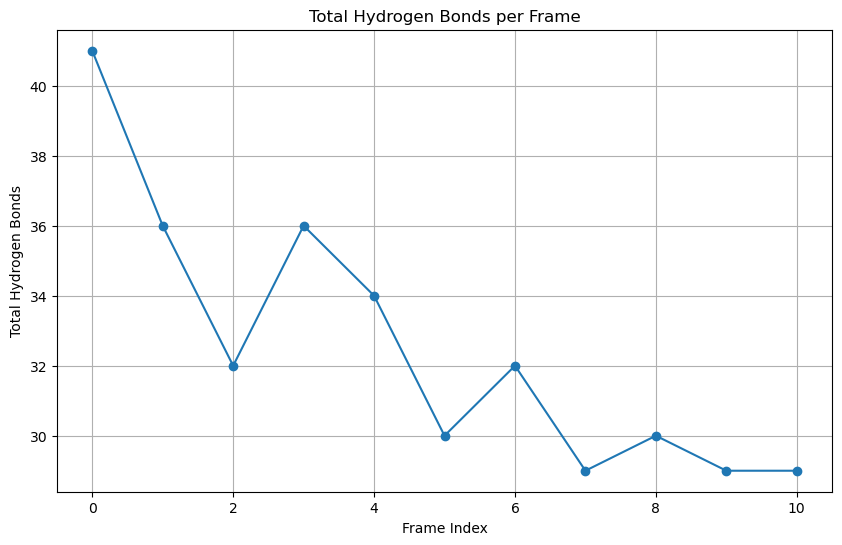

Results written to hydrogen_bond_results.txt


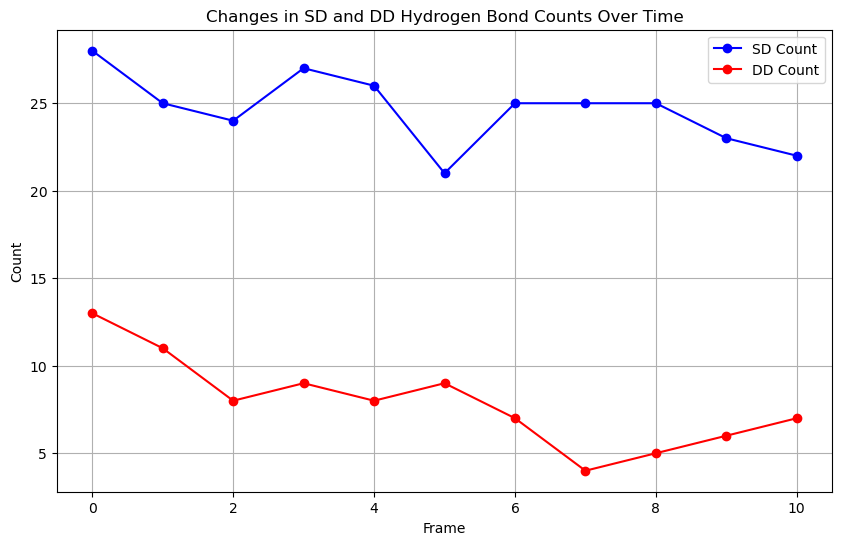

In [10]:
from CRISP.h_bond_analysis import h_bond_2d, plot_total_hydrogen_bonds_per_frame, count_double_donor_hydrogen_bonds, write_results_to_file, plot_hydrogen_bond_counts

hydrogen_bonds_csv = 'hydrogen_bonds.csv'
h_bond_2d(hydrogen_bonds_csv)

# Plot total hydrogen bonds per frame
total_hydrogen_bonds_csv = 'total_hydrogen_bonds_per_frame.csv'
plot_total_hydrogen_bonds_per_frame(total_hydrogen_bonds_csv)

# Count DD and SD hydrogen bonds for each frame
hydrogen_bond_results_txt = 'hydrogen_bond_results.txt'
frame_counts = count_double_donor_hydrogen_bonds(hydrogen_bonds_csv)
# Write the results to the text file
write_results_to_file(hydrogen_bond_results_txt, frame_counts)

# Count double donor hydrogen bonds and plot the counts
plot_hydrogen_bond_counts(hydrogen_bond_results_txt)


# PRDF

### CUSTOM INDICES ON HETERO ATOM PAIRS 

In [13]:
from CRISP.prdf import analyze_rdf

pairwise = ('O', 'Al')  # Pairwise atom symbols
rmax = 12.0             # Maximum distance of RDF
nbins = 100             # Number of bins to divide RDF
use_prdf = True         # Flag to use PRDF for the indices
traj_path = './wrapped_traj.traj'  # Path to the trajectory file
wat_array_path = './indices_detailed/ex_fram_ox.npy'  # Path to the water indices array
al_array_path = './indices_detailed/al_indices.npy'       # Path to the aluminum indices array
output_filename = 'prdf_o_al_custom'  # Optional: specify a custom filename without extension

# Call the analyze_rdf function with optional parameters
x_data_all, y_data_all = analyze_rdf(pairwise, rmax, traj_path, wat_array_path, al_array_path, nbins, use_prdf, frame_skip=2, output_filename=output_filename)

Data saved in 'PRDF/prdf_o_al_custom.pkl'


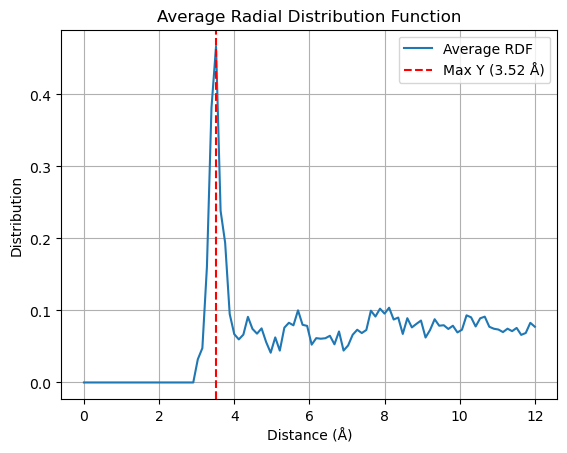

In [14]:
from CRISP.prdf_plot import plot_rdf_from_pickle, animate_rdf_from_pickle

# Plotting the RDF
plot_rdf_from_pickle("./PRDF/prdf_o_al_custom.pkl")


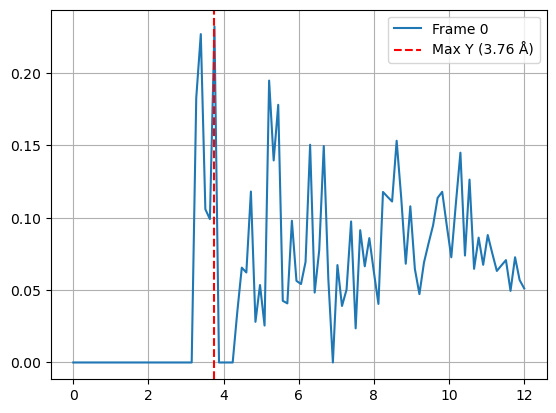

In [15]:
animate_rdf_from_pickle("./PRDF/prdf_al_o_custom.pkl")

### TIP: adjust the rmax depending on the box size, 
### Also try to use frame skips to make the calculation faster 

### ALL INDICES ON ATOM PAIRS 

In [2]:
from CRISP.prdf import analyze_rdf

pairwise = ('Al', 'O')  # Pairwise atom symbols
rmax = 12.0             # Maximum distance of RDF
nbins = 100             # Number of bins to divide RDF
use_prdf = False        # Flag to use PRDF for the indices
traj_path = './wrapped_traj.traj'  # Path to the trajectory file
wat_array_path = './indices_detailed/ex_fram_ox.npy'  # Path to the water indices array
al_array_path = './indices_detailed/al_indices.npy'       # Path to the aluminum indices array
output_filename = 'prdf_al_o_all'  # Optional: specify a custom filename without extension

# Call the analyze_rdf function with optional parameters
x_data_all, y_data_all = analyze_rdf(pairwise, rmax, traj_path, wat_array_path, al_array_path, nbins, use_prdf, frame_skip=2, output_filename=output_filename)

Data saved in 'PRDF/prdf_al_o_all.pkl'


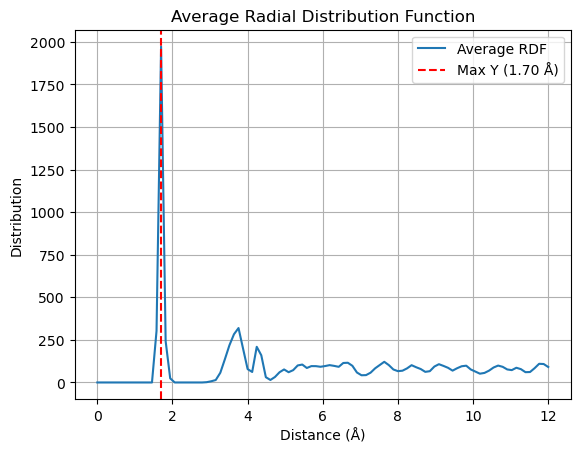

In [3]:
from CRISP.prdf_plot import plot_rdf_from_pickle, animate_rdf_from_pickle

# Plotting the RDF
plot_rdf_from_pickle("./PRDF/prdf_al_o_all.pkl")


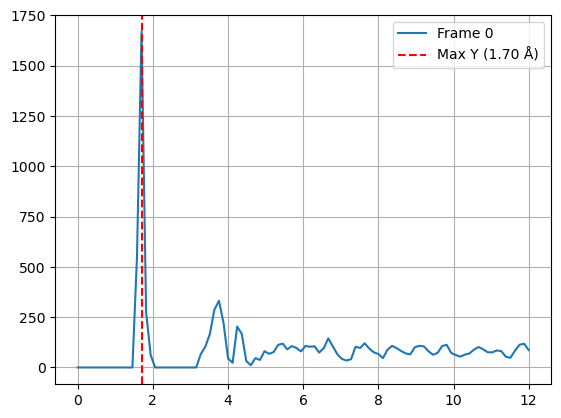

In [4]:
animate_rdf_from_pickle("./PRDF/prdf_al_o_all.pkl")

### CUSTOM INDICES ON HOMO ATOM PAIRS 

In [14]:
from CRISP.prdf import analyze_rdf

pairwise = ('O', 'O')  # Pairwise atom symbols
rmax = 12.0             # Maximum distance of RDF
nbins = 100             # Number of bins to divide RDF
use_prdf = True         # Flag to use PRDF for the indices
traj_path = './wrapped_traj.traj'  # Path to the trajectory file
wat_array_path = './indices_detailed/ex_fram_ox.npy'  # Path to the water indices array
output_filename = 'prdf_ow_ow_all'  # Optional: specify a custom filename without extension

# Call the analyze_rdf function with optional parameters
x_data_all, y_data_all = analyze_rdf(pairwise, rmax, traj_path, wat_array_path, wat_array_path, nbins, use_prdf, frame_skip=2, output_filename=output_filename)

Data saved in 'PRDF/prdf_ow_ow_all.pkl'


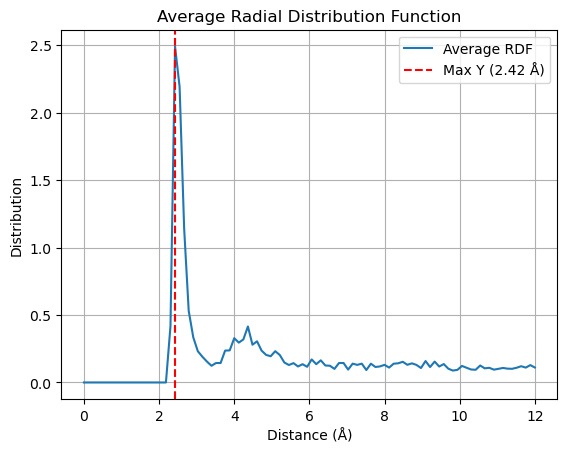

In [15]:
from CRISP.prdf_plot import plot_rdf_from_pickle, animate_rdf_from_pickle


plot_rdf_from_pickle("./PRDF/prdf_ow_ow_all.pkl")


# MSD

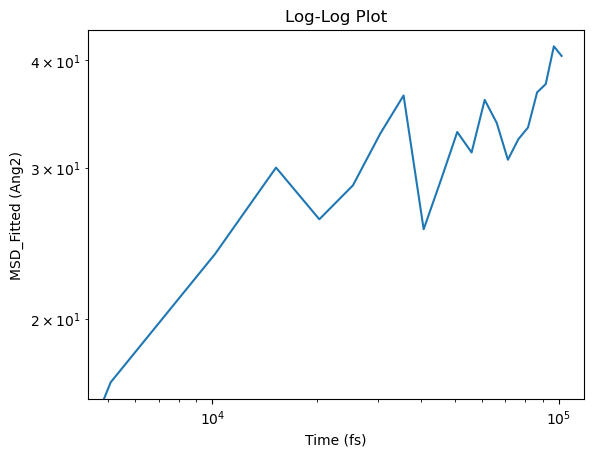

FITTING LINE (Diff Coeff/Meter^2 Sec^-1, STD Err): 4.935403012693005e-09


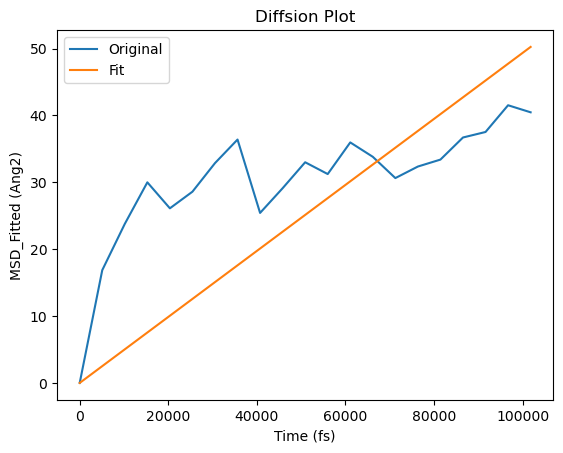

(array([ 0.        , 16.86373267, 23.78648143, 29.99533275, 26.11144235,
        28.59707041, 32.87100828, 36.39241938, 25.42150705, 29.11492706,
        32.99770438, 31.23404929, 35.96478267, 33.81284375, 30.6319685 ,
        32.35844906, 33.39738833, 36.70080018, 37.52506094, 41.52202702,
        40.4674023 ]),
 array([     0.        ,   5090.25283558,  10180.50567116,  15270.75850674,
         20361.01134231,  25451.26417789,  30541.51701347,  35631.76984905,
         40722.02268463,  45812.27552021,  50902.52835578,  55992.78119136,
         61083.03402694,  66173.28686252,  71263.5396981 ,  76353.79253368,
         81444.04536925,  86534.29820483,  91624.55104041,  96714.80387599,
        101805.05671157]))

In [17]:
from CRISP.msd_plot import DiffusionCoefficient
from ase.io import read
import numpy as np

traj_file = ("./wrapped_traj.traj")
atom_indices = np.load("./indices_detailed/ex_fram_ox.npy")
timestep = 0.5 * 1000  

# Read trajectory and atom indices
traj = read(traj_file, ":")

# Create instance of DiffusionCoefficient and perform calculations
diffusion_instance = DiffusionCoefficient(traj, timestep, atom_indices.tolist())
diffusion_instance.calculate()
diffusion_instance.plot()


# here there is only 20 frames so no great liner region, just for illustartion.

### TIP: "timestep" is import input, so check the units and step sizes of the simulation

### Also adjust the "read" of the trajectory to fit the region of internest properly. (running multiple times isn't a issue, its very fast)

# Clustering

In [7]:
from CRISP.clustering_FrameAnalysis import StructureAnalyzer
import numpy as np

# Set the parameters
traj_file = './wrapped_traj.traj'
atom_indices = np.load('./indices_detailed/ex_fram_ox.npy')
threshold = 3.5
min_samples = 2
custom_frame_index = -1


# Analyze the specified frame or the last frame
analyzer = StructureAnalyzer(traj_file, atom_indices, threshold, min_samples, custom_frame_index=custom_frame_index)
analyzer.analyze_structure()



Number of Clusters (including noise): 10
Number of Noise (Cluster Indices with label -1): 3
Silhouette Score (including noise): 0.32688493265485136
Silhouette Score (excluding noise): 0.3973633101025257
Cluster Indices: {0: array([576, 577, 579, 580, 585, 586, 589, 595, 601, 604, 606, 608, 612,
       613, 617, 623]), 1: array([578, 584, 607]), 2: array([581, 592, 620]), 3: array([583, 600, 616]), 4: array([587, 588, 593, 598, 603, 619, 621]), 5: array([590, 610, 614]), 6: array([591, 611, 615, 622]), 7: array([594, 597]), 8: array([599, 602, 605, 618])}
Average Cluster Size: 5.0


In [8]:
# Prompt for custom cluster indices for visualization
custom_indices = [int(i) for i in input("Enter custom cluster indices (e.g., [20, 21, 22, 23, 24]): ").strip('[]').split(',')]

# Visualize custom cluster indices
analyzer.visualize_clusters(custom_indices, "F")

Enter custom cluster indices (e.g., [20, 21, 22, 23, 24]): [591, 611, 615, 622]


### TIP: "threshold" and "min_samples" are import input and sensitive, so use PRDF and Coordination to have a resonable staring point.

### Also interact with the frame visualised and highlight the groups of cluster to see them in ASE (running multiple times isn't a issue, its very fast).

# Correlation

Average number of positive correlations per frame: 18.76
Total number of positive correlations (from atom1_atom2_positive_correlations.csv): 66
Average Correlation per indices pair: 0.29


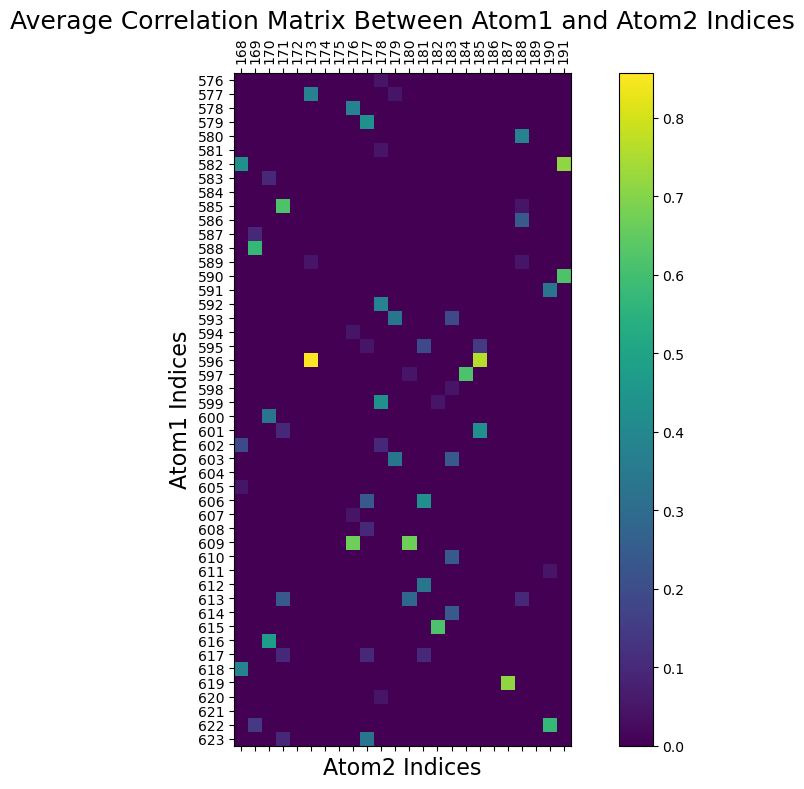

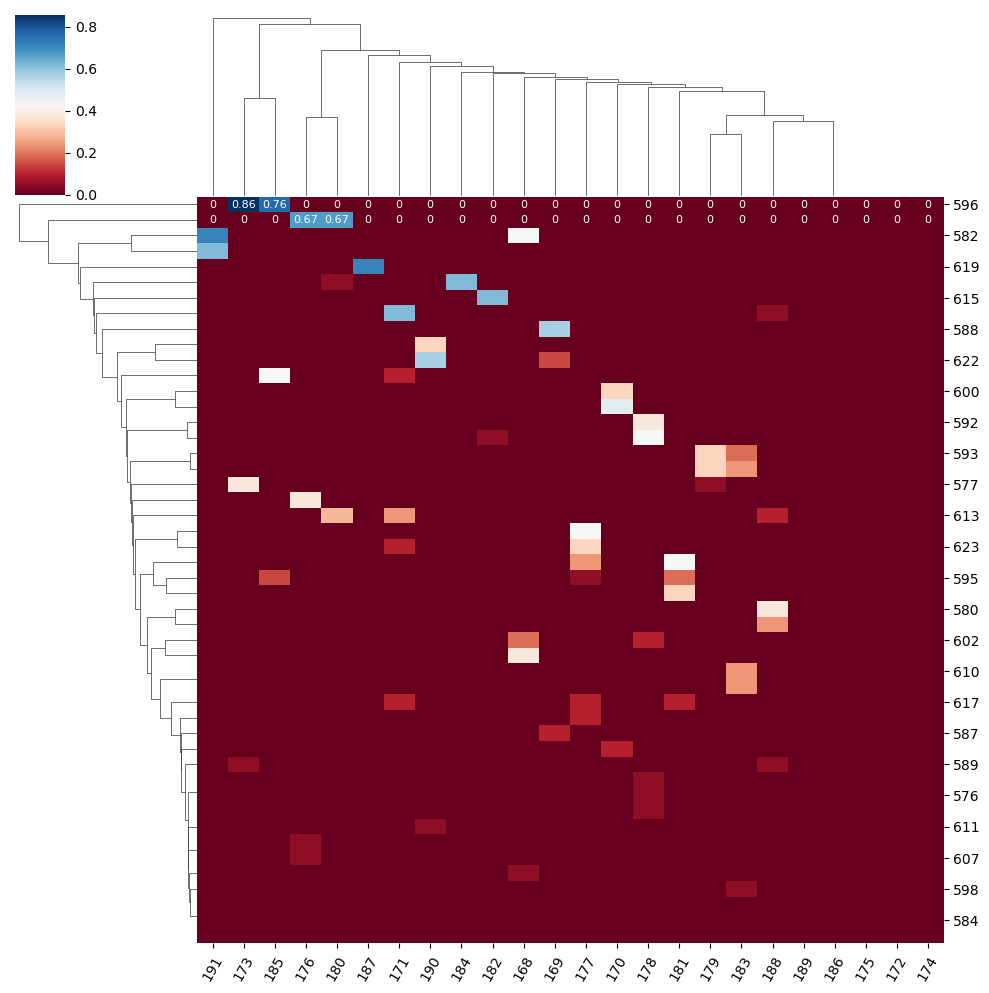

In [19]:
from CRISP.atom_correlation import plot_correlation_matrix

file_path = './wrapped_traj.traj'
atom1_indices_path = "./indices_detailed/ex_fram_ox.npy"
atom2_indices_path = "./indices_detailed/al_indices.npy"

# Call the function with desired parameters
plot_correlation_matrix(
    file_path=file_path, 
    atom1_indices_path=atom1_indices_path, 
    atom2_indices_path=atom2_indices_path, 
    cutoff=3.6, 
    frame_skip=1, 
    average=True, 
    output_dir='./outputs'
)


### TIP: "cutoff" is import input, so again use PRDF and Coordination to have a resonable staring point.

### Also check the .csv files inside the "outputs" folder to gain much details of this atom correlation. 